In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
ab_data = pd.read_csv('data/ab_data.csv')

In [3]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [45]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [6]:
#для удобства сбросим индекс на сгруппированной таблице
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [46]:
daily_data['conversion'] = daily_data['converted'] / daily_data['users_count']

NameError: name 'daily_data' is not defined

In [8]:
daily_data[daily_data['timestamp'] == '2017-01-05']

,timestamp,group,users_count,converted,conversion
6,2017-01-05,A,6419,791,0.123228
7,2017-01-05,B,6509,743,0.114150


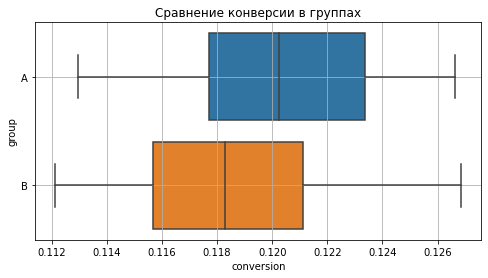

In [25]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# строим boxplot для conversion по признаку group
boxplot = sns.boxplot(data=daily_data, x='conversion', y='group') 
# задаём подпись к графику
boxplot.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
boxplot.grid()

Что можно сказать исходя из этого графика? Во-первых, медианное значение ежедневной конверсии в группе А, выше, чем в группе B. Во-вторых, разброс конверсии в группе B несколько больше, чем в группе A.

In [26]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)

In [28]:
conversion_piv

,mean,median
group,,
A,0.120329,0.120243
B,0.118727,0.118296


Кумулятивная метрика считается стабилизированной, когда на графике прекращаются резкие пики и спады показателя, и линия постепенно выравнивается в горизонтальную прямую. В качестве кумулятивной метрики можно считать не только конверсию, но и выручку, средний чек, количество заказов, процент негативных комментариев, точность модели и так далее.

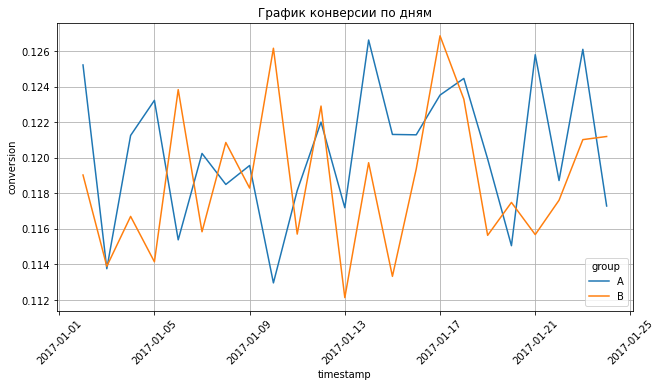

In [39]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [30]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

C:\Users\grish\AppData\Local\Temp\ipykernel_1056\906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [31]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,0.125219,2851,357,12.521922
1,2017-01-02,B,2848,339,0.119031,2848,339,11.903090
2,2017-01-03,A,6584,749,0.113761,9435,1106,11.722311
3,2017-01-03,B,6620,754,0.113897,9468,1093,11.544149
4,2017-01-04,A,6573,797,0.121254,16008,1903,11.887806


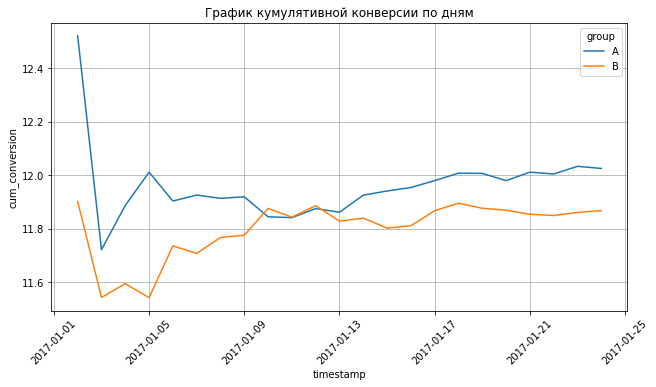

In [32]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True)

In [3]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [40]:
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [90]:
a_daily = sample_a.groupby(['date']).agg({
    'cid': 'count',
    'transactions': 'sum',
    'revenue': 'sum'
})

In [43]:
a_daily.head()

,cid,transactions,revenue
date,,,
2020-11-06,2576,16,1577279
2020-11-07,2704,23,1721886
2020-11-08,3354,25,846051
2020-11-09,3234,18,708830
2020-11-10,3022,29,826984


In [91]:
b_daily = sample_b.groupby(['date']).agg({
    'cid': 'count',
    'transactions': 'sum',
    'revenue': 'sum'
})

In [92]:
b_daily.head()

,cid,transactions,revenue
date,,,
2020-11-06,2499,19,996645
2020-11-07,2804,19,555499
2020-11-08,3291,24,3044842
2020-11-09,3062,25,1285836
2020-11-10,3072,30,2414726


In [48]:
a_daily.loc['2020-11-08']

cid               3354
transactions        25
revenue         846051
Name: 2020-11-08, dtype: int64

In [6]:
a_daily['cum_cid'] = a_daily['cid'].cumsum()

In [7]:
a_daily['cum_transactions'] = a_daily['transactions'].cumsum()
a_daily['cum_revenue'] = a_daily['revenue'].cumsum()

In [8]:
b_daily['cum_cid'] = b_daily['cid'].cumsum()
b_daily['cum_transactions'] = b_daily['transactions'].cumsum()
b_daily['cum_revenue'] = b_daily['revenue'].cumsum()

In [9]:
a_daily['cum_conversion'] = a_daily['cum_transactions'] / a_daily['cum_cid'] * 100
b_daily['cum_conversion'] = b_daily['cum_transactions'] / b_daily['cum_cid'] * 100

In [59]:
a_daily.head()

,cid,transactions,revenue,cum_cid,cum_transactions,cum_revenue,cum_conversion
date,,,,,,,
2020-11-06,2576,16,1577279,2576,16,1577279,0.621118
2020-11-07,2704,23,1721886,5280,39,3299165,0.738636
2020-11-08,3354,25,846051,8634,64,4145216,0.741256
2020-11-09,3234,18,708830,11868,82,4854046,0.690934
2020-11-10,3022,29,826984,14890,111,5681030,0.745467


In [61]:
a_daily['cum_conversion'].mean()

0.7127554606160045

In [62]:
b_daily['cum_conversion'].mean()

0.7621783890588011

In [68]:
a_daily['cum_conversion']

date
2020-11-06    0.621118
2020-11-07    0.738636
2020-11-08    0.741256
2020-11-09    0.690934
2020-11-10    0.745467
2020-11-11    0.717915
2020-11-12    0.690614
2020-11-13    0.732644
2020-11-14    0.751144
2020-11-15    0.744524
2020-11-16    0.729809
2020-11-17    0.704683
2020-11-18    0.690995
2020-11-19    0.698523
2020-11-20    0.704076
2020-11-21    0.696890
2020-11-22    0.714126
2020-11-23    0.716246
Name: cum_conversion, dtype: float64

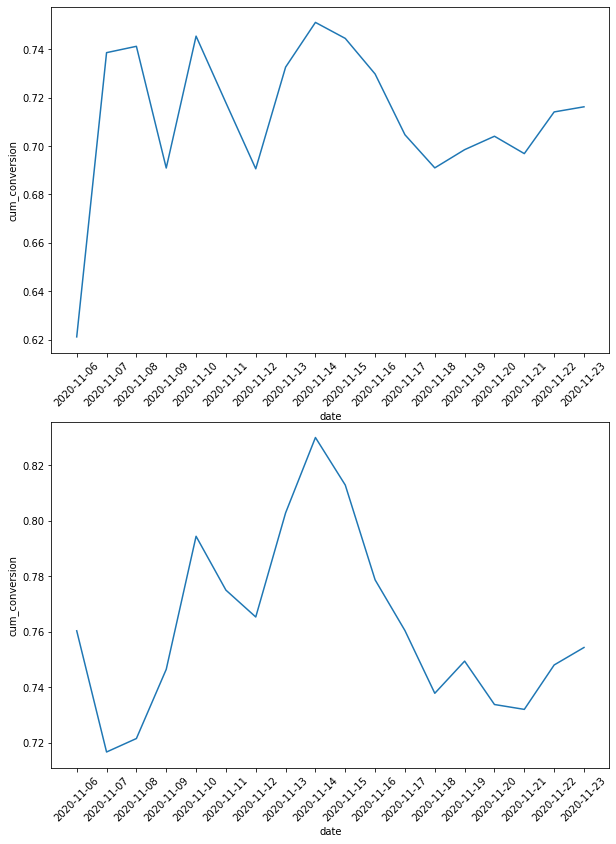

In [10]:
fig, (a, b) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 14))
sns.lineplot(x = a_daily.index, y = 'cum_conversion', data = a_daily, ax = a)
sns.lineplot(x = b_daily.index, y = 'cum_conversion', data = b_daily, ax = b)
a.xaxis.set_tick_params(rotation=45)
b.xaxis.set_tick_params(rotation=45)

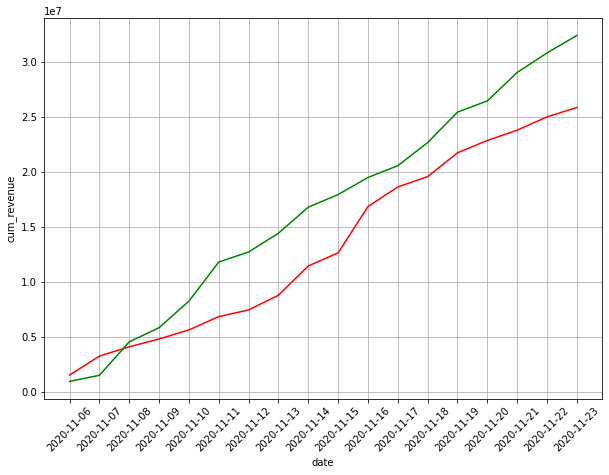

In [41]:
plt.figure(figsize=(10, 7))
lineplot = sns.lineplot(x = a_daily.index, y = 'cum_revenue', data = a_daily, color = 'red')
sns.lineplot(x = b_daily.index, y = 'cum_revenue', data = b_daily, color = 'green')
lineplot.xaxis.set_tick_params(rotation=45)
lineplot.grid()

<center> <img src = https://lms.skillfactory.ru/assets/courseware/v1/d7233d514b2e667433a4399af30c75fa/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-4-10.png alt="drawing" style="width:700px;">

In [42]:
from statsmodels.stats.proportion import proportions_ztest

Для получения z-статистики и p-value нам необходимо передать в функцию следующие аргументы:
- count, количество успехов в каждой из групп (количество пользователей, совершивших целевой действие)
- nobs, количество наблюдений в каждой из групп (размер выборки)
- alternative, альтернативная гипотеза (two-sided, по умолчанию, smaller, larger)

In [47]:
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)

In [48]:
converted_piv

,sum,count
group,,
A,17467,145241
B,17238,145241


 Применим z-тест для пропорций на примере конверсии нашего интернет-магазина. 

In [49]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [50]:
time_data = pd.read_excel('data/time_data.xlsx')

In [52]:
time_data.head()

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


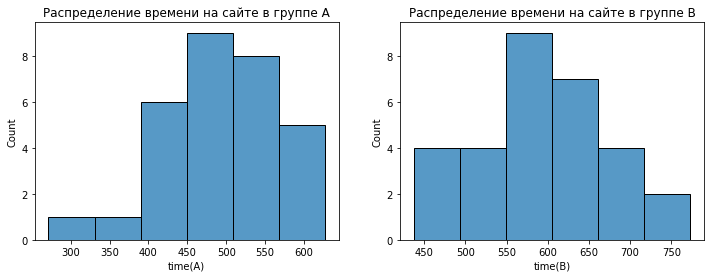

In [53]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

Проверим гипотезу о нормальности обоих распределений с помощью критерия Шапиро-Уилка.

In [54]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


Итак, распределение в обоих группах нормальное, значит мы можем воспользоваться Т-тестом для того, чтобы сравнить среднее время посещения сайта в группах

In [55]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B


In [57]:
converted_piv['sum']

group
A    17467
B    17238
Name: sum, dtype: int64

In [61]:
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [69]:
z_a = sample_a.groupby(by = 'group')['transactions'].agg(['count', 'sum'])

In [70]:
z_a.head()

,count,sum
group,,
A,61571,441


In [71]:
z_b = sample_b.groupby(by = 'group')['transactions'].agg(['count', 'sum'])

In [72]:
z_b.head()

,count,sum
group,,
B,61383,463


In [74]:
for_z_test = pd.concat([z_a, z_b])

In [75]:
for_z_test

,count,sum
group,,
A,61571,441
B,61383,463


In [76]:
H0 = 'Конверсии в группах А и В равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе В'
#alternative = 'smaller'
alpha = 0.1

_, p_value = proportions_ztest(
    count=for_z_test['sum'], #число "успехов"
    nobs=for_z_test['count'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.22
Принимаем нулевую гипотезу. Конверсии в группах А и В равны


In [95]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.15 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(a_daily['revenue'])
shapiro_result_b = shapiro(b_daily['revenue'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.0
p-value группы B 0.48
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


<AxesSubplot:xlabel='revenue', ylabel='Count'>

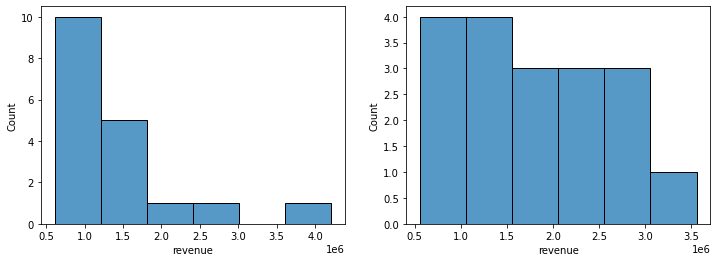

In [94]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='revenue', data=a_daily, ax=axes[0])
sns.histplot(x='revenue', data=b_daily, ax=axes[1])

In [96]:
from scipy.stats import mannwhitneyu
H0 = 'Cредние чеки в группах А и В равны'
H1 = 'Среднее п'
alpha = 0.1
U1, p = mannwhitneyu(a_daily['revenue'], b_daily['revenue'], alternative = 'less')

In [98]:
p

0.058661352599399794

In [1]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [2]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое

In [3]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат
 
 
 
# Доверительный интервал: (12180, 20020)

Доверительный интервал: (12180, 20020)


Аккумуляторный завод производит батарейки, срок службы которых имеет истинное стандартное отклонение в 2.4 месяца. Средний срок службы батареек в случайной выборке из 64 штук составил 12.35 месяца. Необходимо построить 90 %-ный доверительный интервал для истинного среднего срока службы производимой батарейки и ответить на вопросы заданий ниже.

In [4]:
alpha = 0.1 #90% доверительный интервал

In [5]:
z_crit = -norm.ppf(alpha/2)

In [6]:
n = 64
x_mean = 12.35
sigma = 2.4

In [9]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (lower_bound, upper_bound) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (11.856543911914558, 12.843456088085441)


In [8]:
z_crit

1.6448536269514729

In [10]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [11]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [12]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат
 
 
# Доверительный интервал: (1778, 2222)

Доверительный интервал: (1778, 2222)


Важно отметить, что при достаточной выборке (примерно более 30 наблюдений) распределение Стьюдента очень похоже на стандартное нормальное распределение. В этом случае можно использовать первую формулу (z-критическое) даже при неизвестном стандартном отклонении. Однако используя вторую формулу при оценке среднего, вы не ошибётесь.

Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. На случайной выборке из 25 домохозяйств был посчитан средний размер выплаченного налога, и он составил $ 3 540. Также известно выборочное отклонение величины подоходного налога, равное $ 1 150.

In [19]:
n = 25
k = n -1
x_mean = 3540
x_std = 1150
gamma = 0.90
alpha = 1 - gamma

In [20]:
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [21]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница

In [22]:
lower_bound

3146.4971216208314

In [23]:
upper_bound

3933.5028783791686

In [26]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [27]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [28]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [29]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'].count(), # размер выборки
x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))
# Доверительный интервал для конверсии группы А: (11.86, 12.19)
# Доверительный интервал для конверсии группы B: (11.7, 12.03)

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


In [42]:
conf_interval_a

(11.86, 12.19)

In [43]:
conf_interval_b

(11.7, 12.03)

In [30]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
   
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [31]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))
 
# Доверительный интервал для разности конверсий: (-0.39, 0.08)

Доверительный интервал для разности конверсий: (-0.39, 0.08)


Отсюда можно сделать вывод, что статистической разницы в конверсии между вариантами А и B не существует, то есть они являются равнозначными по данной метрике.

In [32]:
132/189

0.6984126984126984

In [33]:
x_p = 0.698
n = 189
gamma = 0.9
alpha = 1 - gamma # уровень значимости
z_crit = -norm.ppf(alpha/2) # z критическое
eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
lower_bound = x_p - eps # левая (нижняя) граница
upper_bound = x_p + eps # правая (верхняя) граница

In [37]:
lower_bound * 100

64.30677310768527

In [36]:
upper_bound * 100

75.2932268923147

In [40]:
proportions_conf_interval(189, 132/189, gamma=0.90)

(64.35, 75.33)

In [45]:
personal_a = proportions_conf_interval(n = 1000, x_p = 45/1000 )

In [47]:
personal_a

(3.22, 5.78)

In [46]:
hits_b = proportions_conf_interval(n = 1000, x_p = 50/1000)

In [48]:
hits_b

(3.65, 6.35)

In [49]:
diff_ab = diff_proportions_conf_interval(n = [1000, 1000], xp = [45/1000, 50/1000])

In [50]:
diff_ab

(-1.36, 2.36)

In [51]:
data = pd.read_csv('data/ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000
